Task #1: Understand The Problem Statement And Business Case
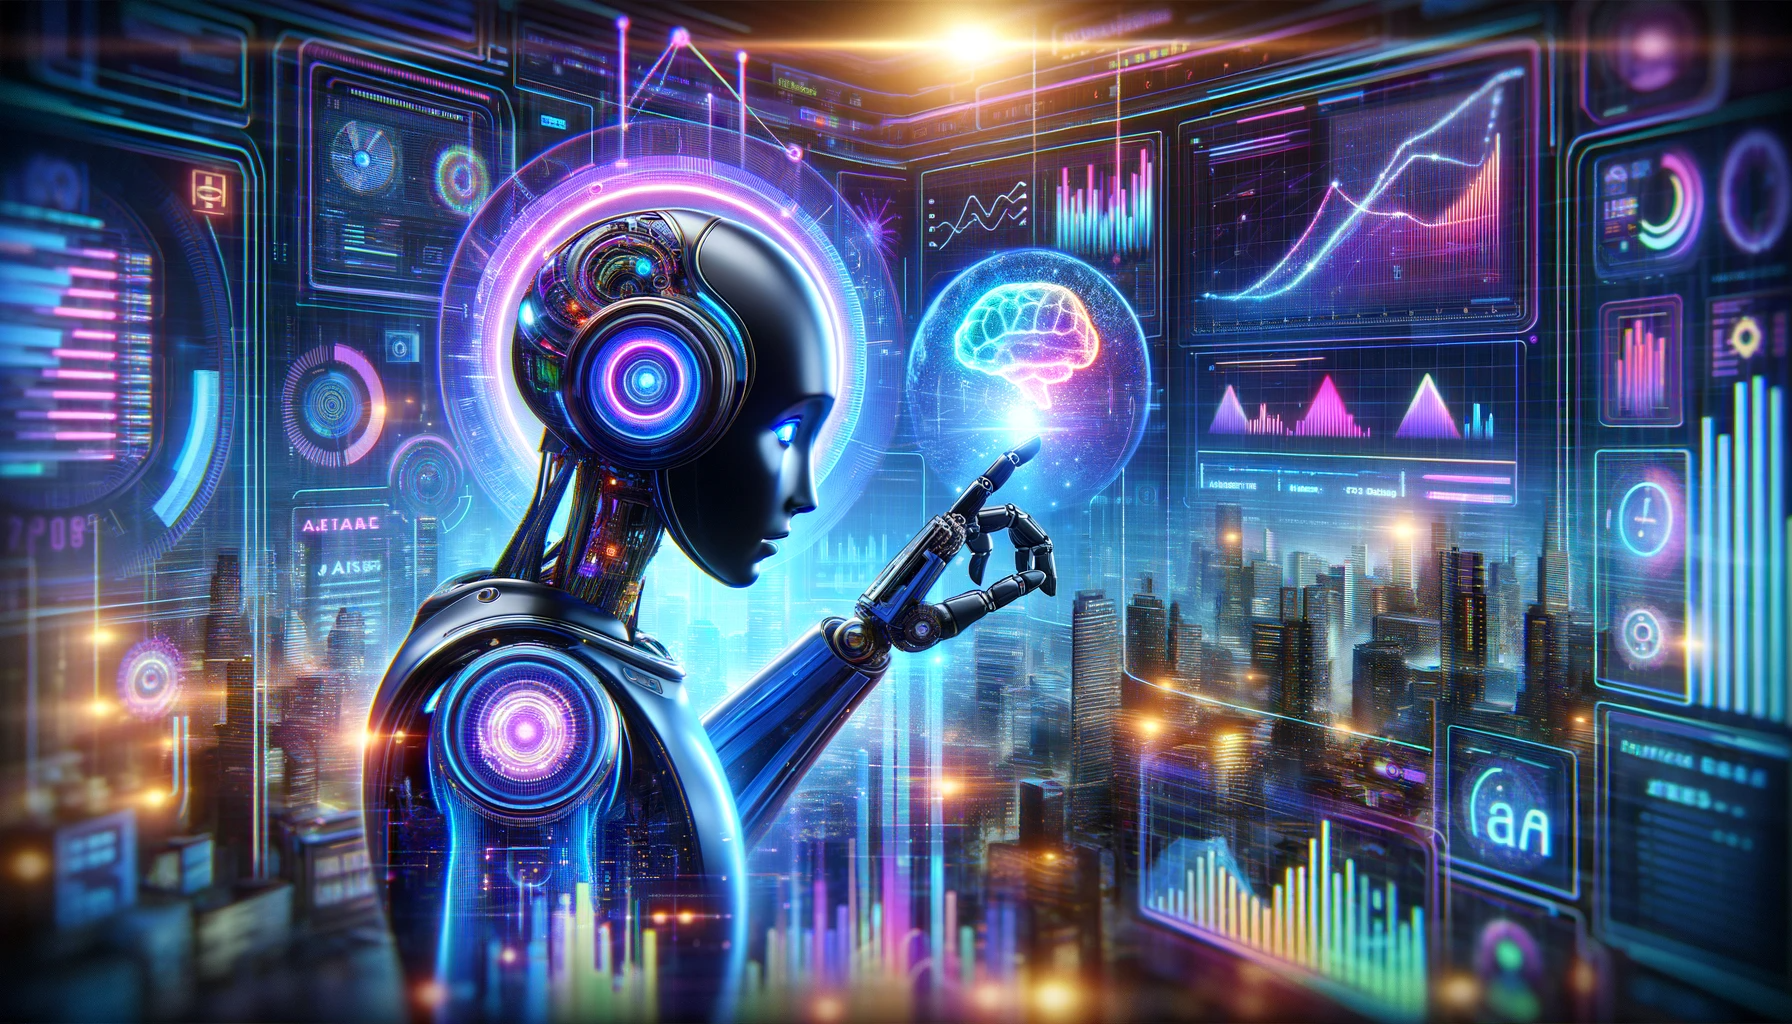



*   Marketing is crucial for growth and sustainability of any business.
*   Marketers can help build the company's brand, engage customers, grow revenue, and increase sales.




*   One of the key pain points for marketers is to know their customers and identify their needs.
* By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
* If data about the customers is available, data science can be applied to perform market segmentation.





*   In this case study, you have been hired as a consultant to a bank in New York City.
* The bank has extensive data on their customers for the past 6 months.
* The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distincive groups.





*   #CUSTID: Identification of Credit Card holder
* #BALANCE: Balance amount left in customer's account to make purchases
* #BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1=frequently updated, 0=not frequently updated)
* #PURCHASES: Amount of purchases made from account
* #ONEOFFPURCHASES: Maximum purchase amount done in one-go
* #INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* #CASH_ADVANCE: Cash in advance given by the user
* #PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1=freqently purchased, 0=not frequently purchased)





*   #PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1=frequently purchased, 0=not frequently purchased)
* #ONEOFF_PURCHASES_FREQUENTLY: How frequently Purchases are happening in one-go (1=frequently purchased, 0=not frequently purchased)
* #PURCHASES_INSTALLMENTS_FREQUENCY: How frequency purchases in installments are being done (1=frequently done, 0=not frequently done)
* #CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid





*   #CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* #PURCHASES_TRX: Number of purchase transactions made
* #CREDIT_LIMIT: Limit of Credit Card for user
* #PAYMENTS: Amount of Payment done by user
* #MINIMUM_PAYMENTS: Minimum amount of payments made by user
* #PRC_FULL_PAYMENT: Percent of full payment paid by user
* #TENURE: Tenure of credit card service for user.



##**Task #2: Import Libraries and Datasets**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset

creditcard_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science for Business/Marketing_data.csv')

In [ ]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

## **Task #3: Visualize And Explore Dataset**

<Axes: >

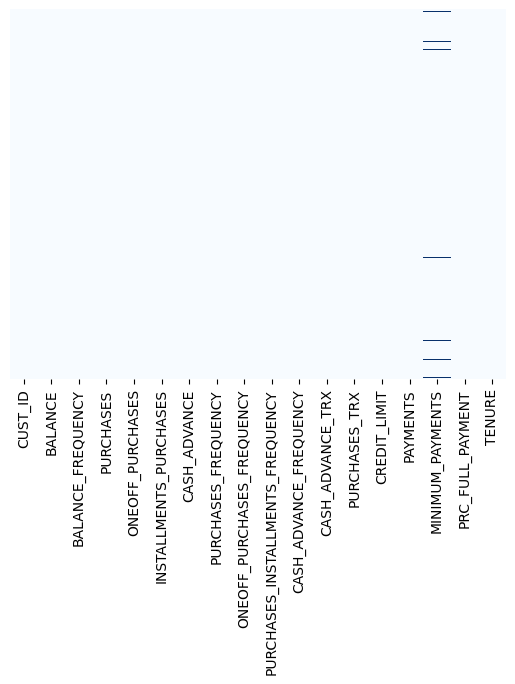

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

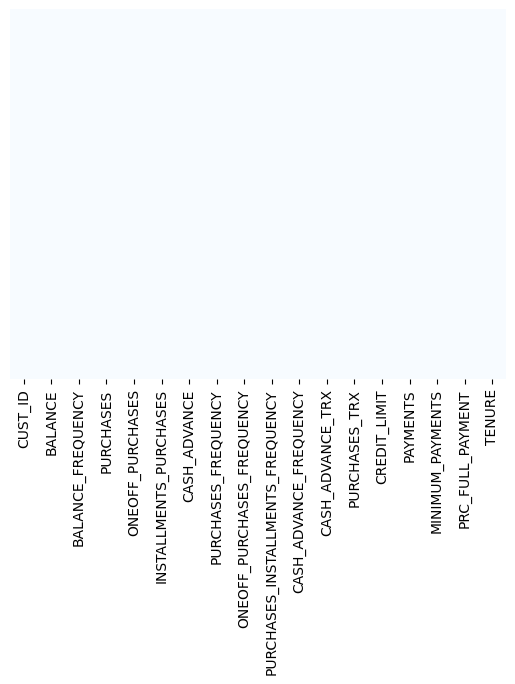

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False,cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-24-d4be8a647809>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-24-d4be8a647809>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

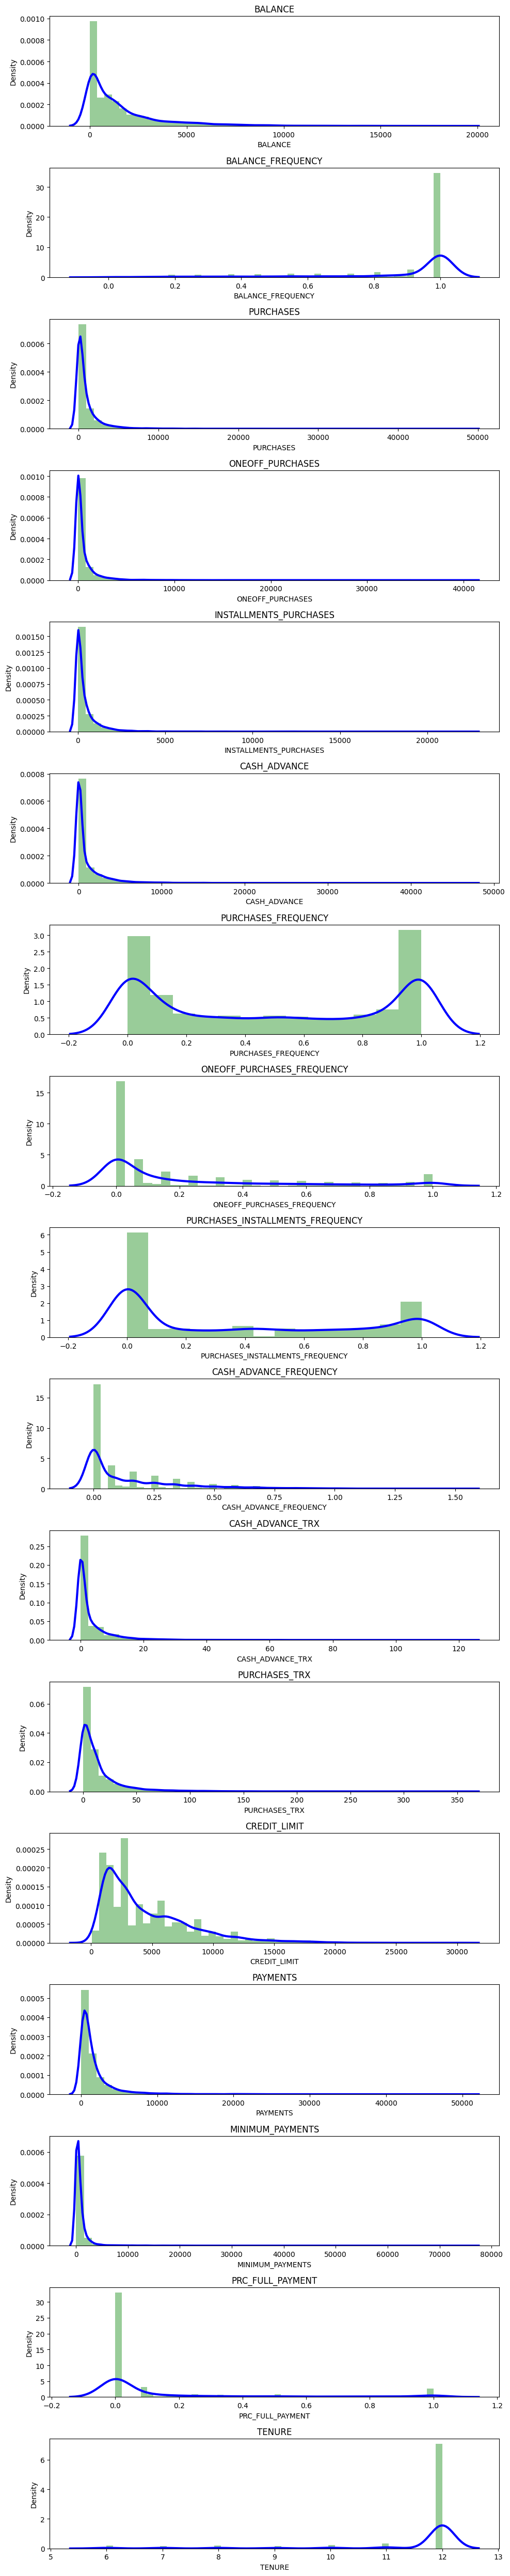

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off purchase or installment or installment purchases
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# sns.pairplot(crditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

In [ ]:
correlations = creditcard_df.corr()
correlations

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

<Axes: >

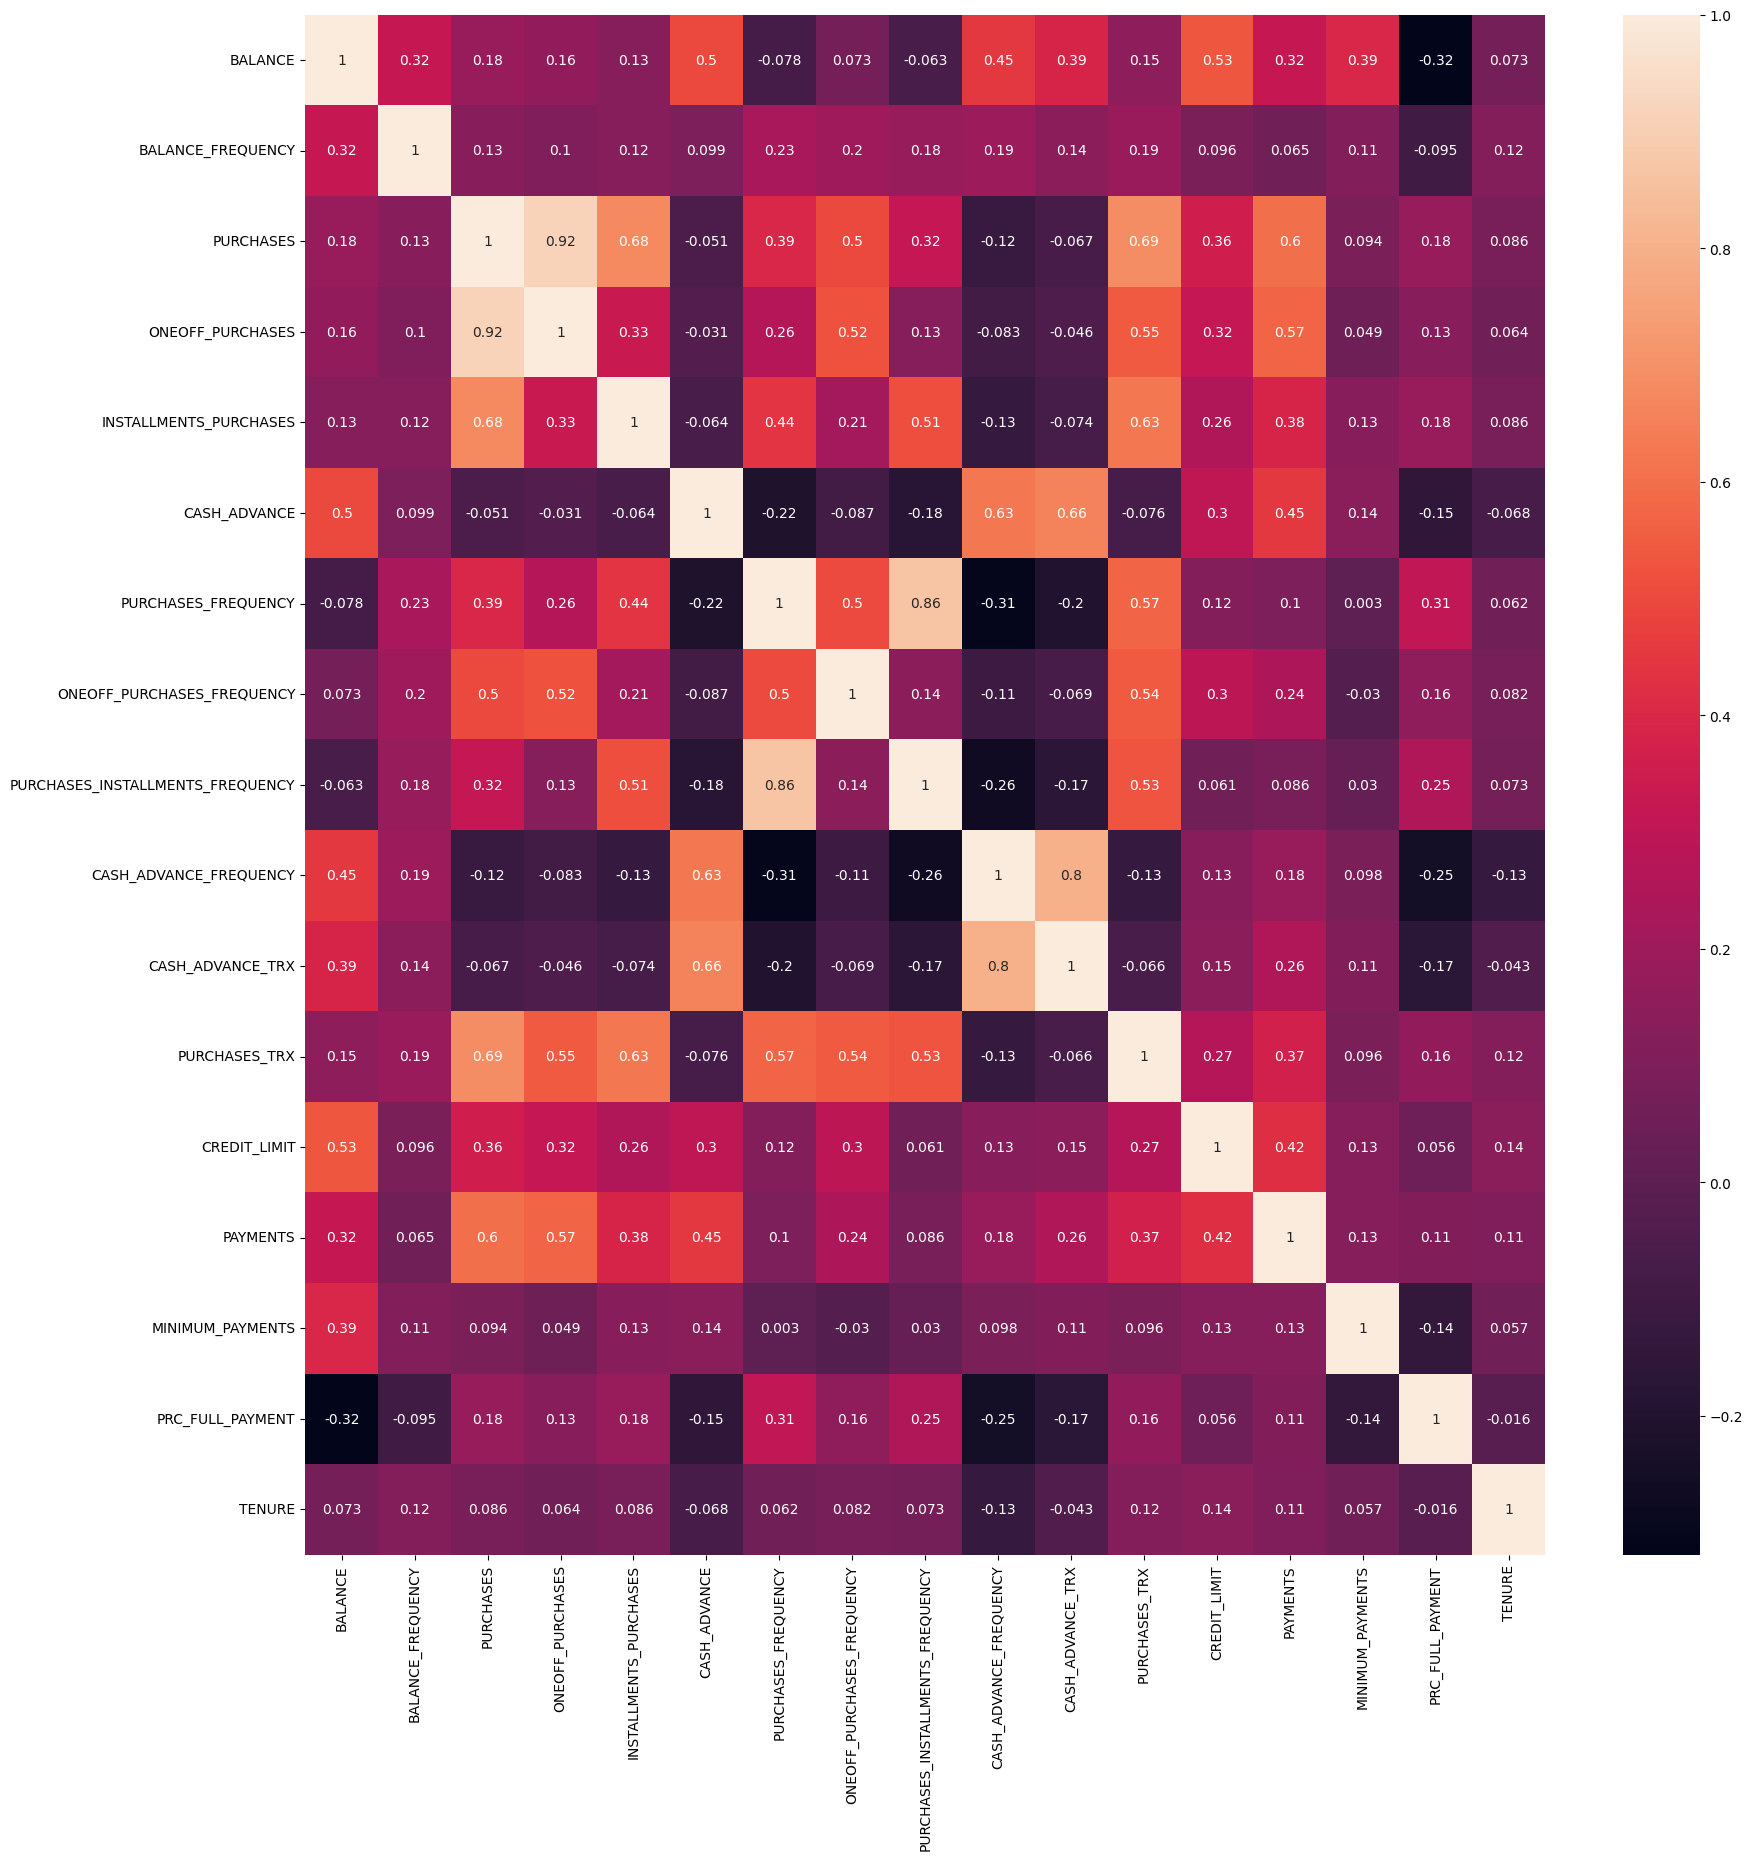

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have hight correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit, and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

## **TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS**

# **K-MEANS INTUITION**


*   K-means is an unsupervised learning algorithm (clustering).
* K-means works by grouping some data points together (clustering) in an unsupervised fashion.
* The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.



# **K-MEANS ALGORITHM STEPS**

1.   Choose number of clusters "K"
2.   Select random K points that are going to be the centroids for each cluster
3.   Assign each data point to the nearest centroid, doing so will enable us to create "K" number of clusters
4.   Calculate a new centroid for each cluster
5.   Reassign each data point to the new closest centroid
6.   Go to step 4 and repeat.





# **HOW TO SELECT THE OPTIMAL NUMBER OF CLUSTERS (K)? "ELBOW METHOD"**

Within Cluster Sum of Squares (WCSS)

$\displaystyle \sum_{P_i \_in \_Cluster \_1}distance({P_i}, {C_1})^{2} + \sum_{P_i \_in \_Cluster \_2}distance({P_i}, {C_2})^{2} + \sum_{P_i \_in \_Cluster \_3}distance({P_i}, {C_3})^{2} $



## **TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**



*   The elbow method is a heuristic method of interpretation and validation of consistency wihtin cluster analysis designed to help find the appropriate number of clusters in a dataset.
* If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.



In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

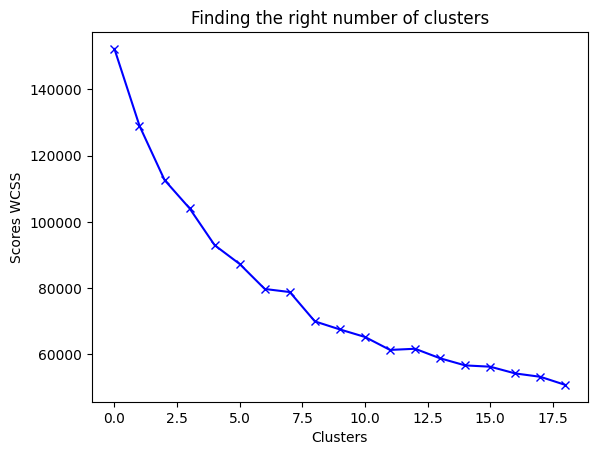

In [ ]:
scores_1 = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

## **TASK #6: APPLY K-MEANS METHOD**

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.391909          0.307747  -0.051385        -0.255045   
1 -0.130270          0.378059  -0.337663        -0.223252   
2 -0.092116          0.402067   0.576446         0.695703   
3  2.220500          0.403394  -0.100560        -0.075948   
4 -0.698704         -2.155740  -0.317454        -0.236191   
5  1.108132          0.476356   2.545923         1.810782   
6  0.709064          0.311896  -0.359438        -0.257150   
7  1.865907          0.332878  12.596844        13.111182   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.347022    -0.362510            1.015611   
1              -0.388113    -0.243683           -0.784827   
2               0.084665    -0.321305            0.997305   
3              -0.098328     3.022522           -0.243344   
4              -0.316585    -0.313436           -0.561614   
5               2.693151    -0.138522            1.168778   
6              -0.377536     0.825357           -0.805929   
7               5.696389    -0.004178            1.033322   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.409504                         1.213727   
1                  -0.350669                        -0.719935   
2                   1.878583                         0.238105   
3                  -0.074866                        -0.187853   
4                  -0.435228                        -0.456179   
5                   1.522211                         1.291749   
6                  -0.388060                        -0.699815   
7                   2.170634                         0.866221   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.471832        -0.363452      0.157034    -0.312596   
1              -0.161231        -0.212857     -0.462987    -0.394732   
2              -0.407534        -0.328540      0.666704     0.471952   
3               2.200849         2.678050     -0.106837     1.472090   
4              -0.489790        -0.369247     -0.427110    -0.213216   
5              -0.271592        -0.154750      3.186918     1.327737   
6               1.420169         0.948005     -0.459372     0.204622   
7              -0.476183        -0.214854      4.566558     3.174197   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.236743        -0.065912         0.386439 -0.029916  
1 -0.301068        -0.059820        -0.449665  0.145129  
2  0.163479        -0.149943         0.429098  0.223147  
3  1.563928         0.801960        -0.351395  0.082636  
4 -0.225623        -0.254861         0.259382 -0.161744  
5  1.481425         0.797973         0.237432  0.335922  
6  0.017565         0.151898        -0.422959 -0.409205  
7  8.991136         1.064817         1.236317  0.295702

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   748.748580          0.950173    893.419684       169.115141   
1  1293.329072          0.966829    281.783547       221.884002   
2  1372.744129          0.972517   2234.790271      1747.161442   
3  6186.257417          0.972831    788.357158       466.379509   
4   110.182090          0.366596    324.959104       200.408547   
5  3870.958462          0.990115   6442.608795      3597.965211   
6  3040.331349          0.951156    235.259558       165.621818   
7  5448.201718          0.956126  27916.555652     22354.314348   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             724.875218   218.671020            0.897964   
1              60.102034   467.857307            0.175362   
2             487.628830   305.078695            0.890617   
3             322.150646  7317.241150            0.392685   
4             124.783708   321.581991            0.264948   
5            2846.450813   688.383684            0.959438   
6              69.666175  2709.682385            0.166892   
7            5562.241304   970.110470            0.905072   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.080295                         0.846803   
1                   0.097846                         0.078317   
2                   0.762875                         0.459066   
3                   0.180124                         0.289780   
4                   0.072621                         0.183140   
5                   0.656563                         0.877811   
6                   0.086692                         0.086313   
7                   0.850000                         0.708696   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.040726         0.768532     18.613104   3357.096310   
1               0.102880         1.796236      3.201718   3058.251500   
2               0.053592         1.006785     31.281595   6211.602282   
3               0.575557        21.524548     12.054264   9850.516796   
4               0.037132         0.728987      4.093480   3718.683342   
5               0.080796         2.192771     93.924699   9325.301205   
6               0.419334         9.718264      3.291564   5238.947212   
7               0.039855         1.782609    128.217391  16043.478261   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1047.796236       710.600571         0.266741  11.477284  
1    861.581628       724.799363         0.022195  11.711538  
2   2206.398822       514.770858         0.279219  11.815946  
3   6260.563466      2733.140250         0.050938  11.627907  
4   1079.987867       270.263048         0.229579  11.300864  
5   6021.723992      2723.847863         0.223159  11.966867  
6   1783.991848      1218.197484         0.030006  10.969697  
7  27761.600386      3345.718254         0.515316  11.913043

In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        6  
2   622.066742        627.284787          0.000000      12        2  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

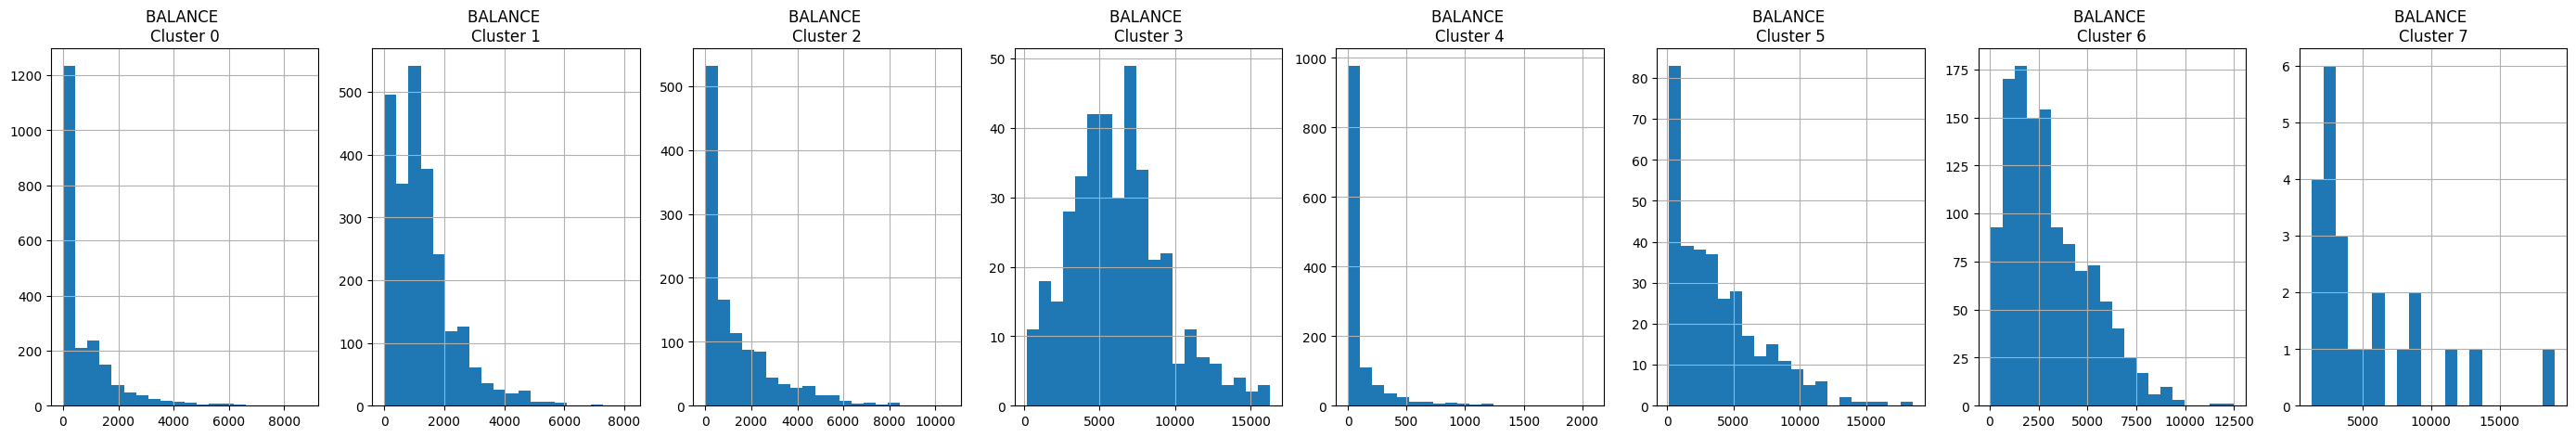

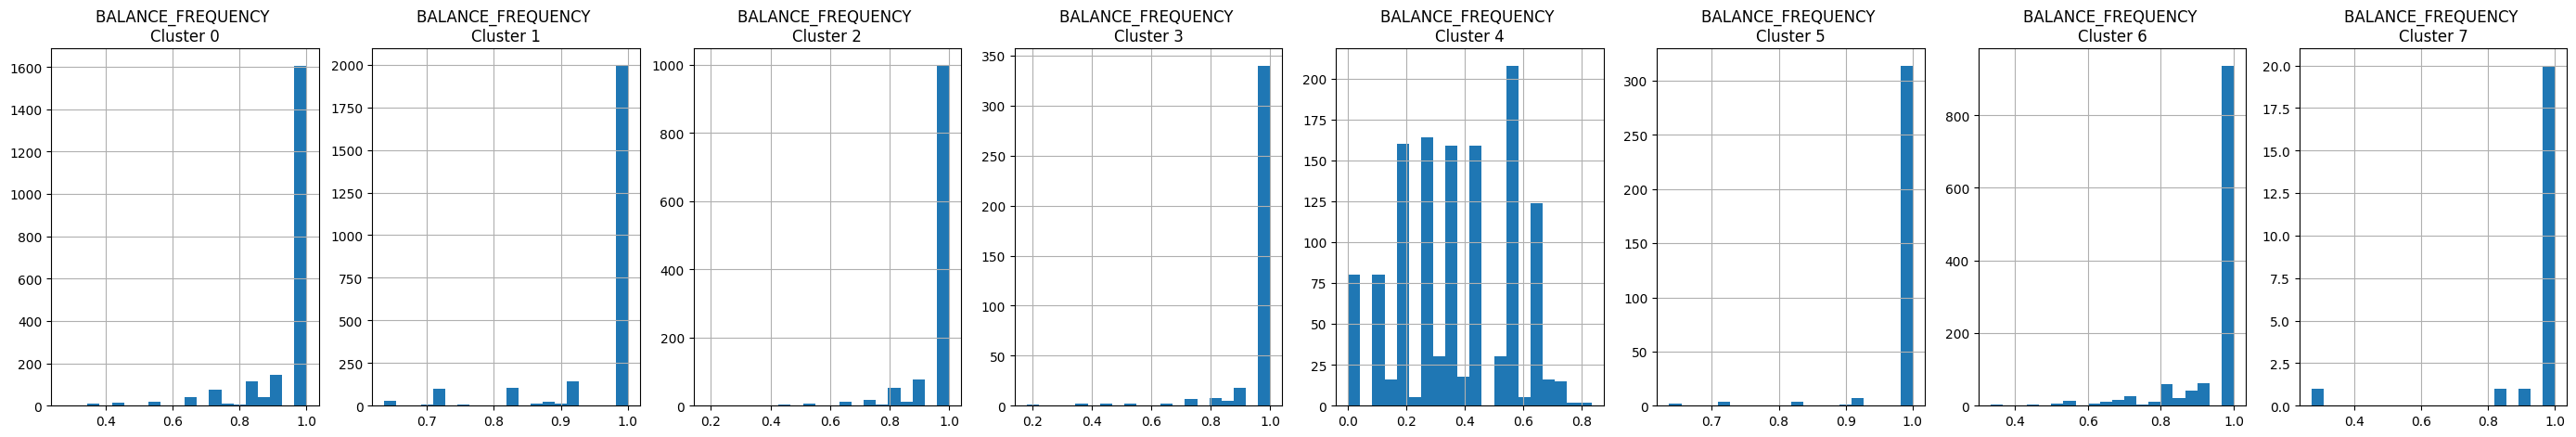

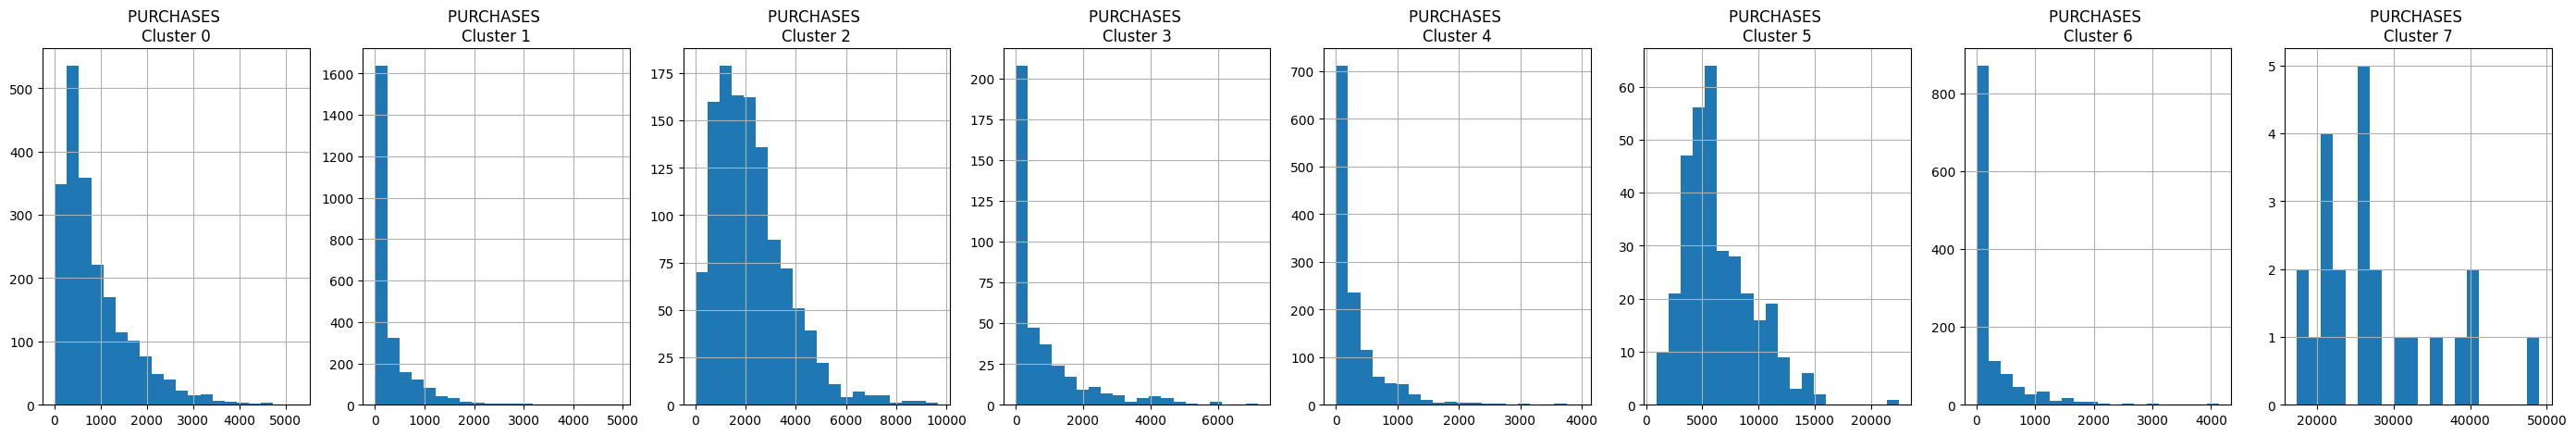

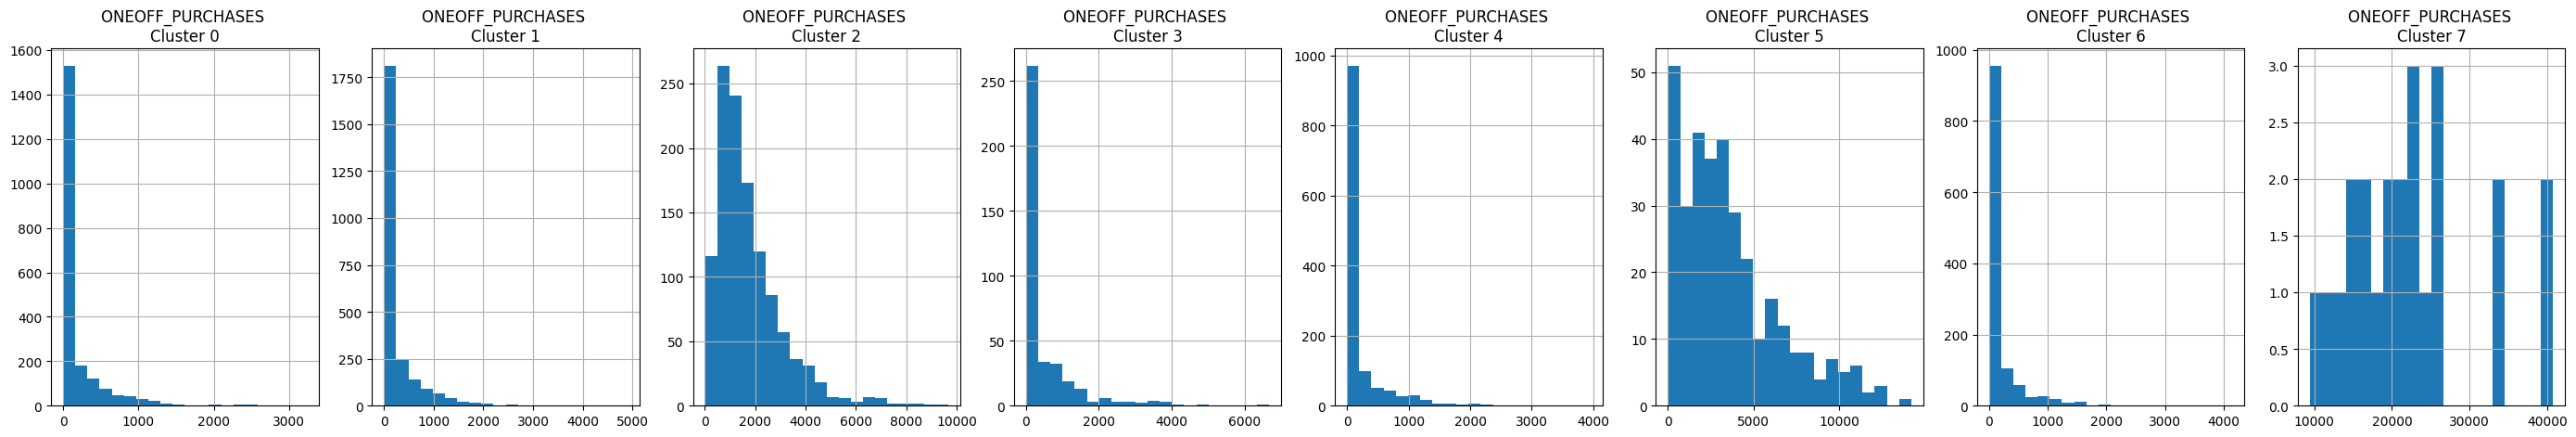

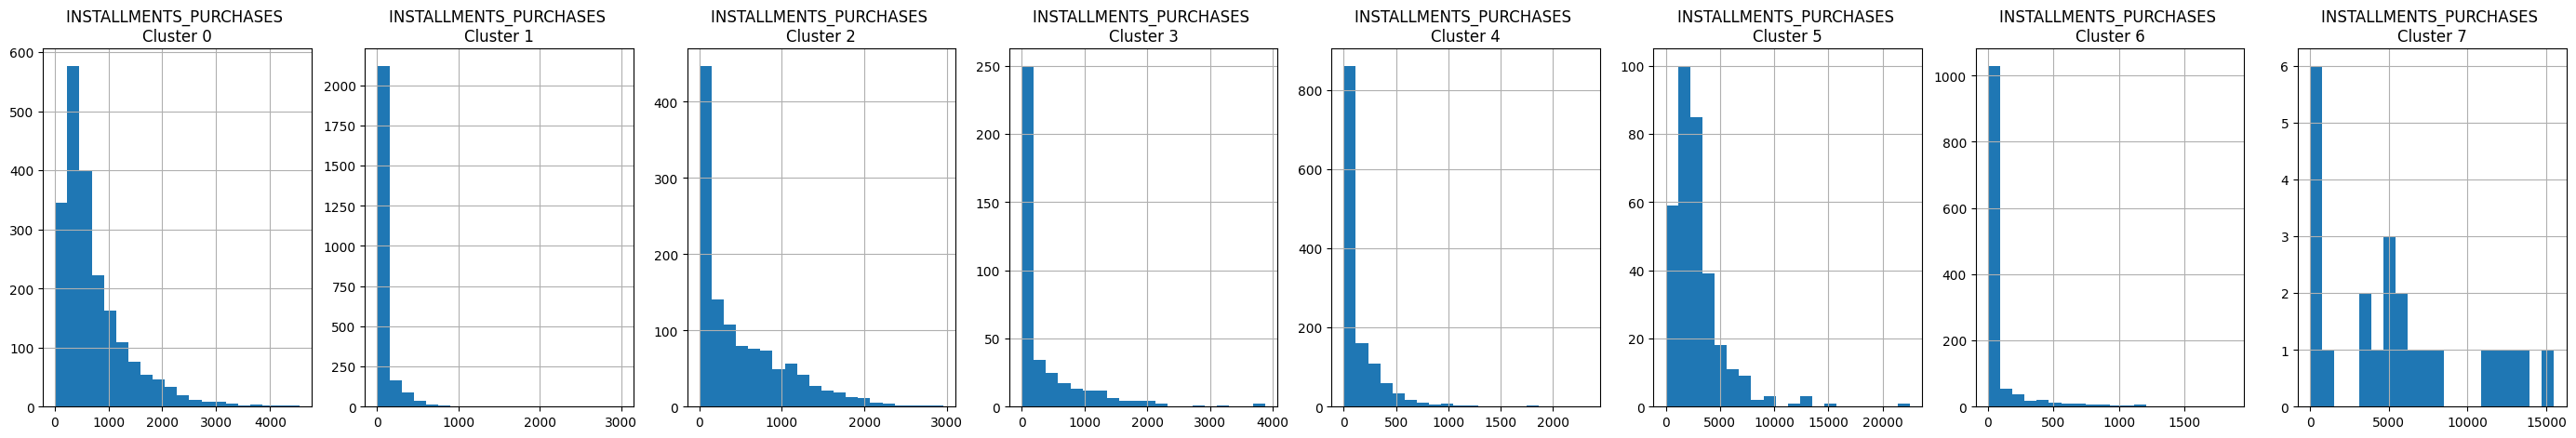

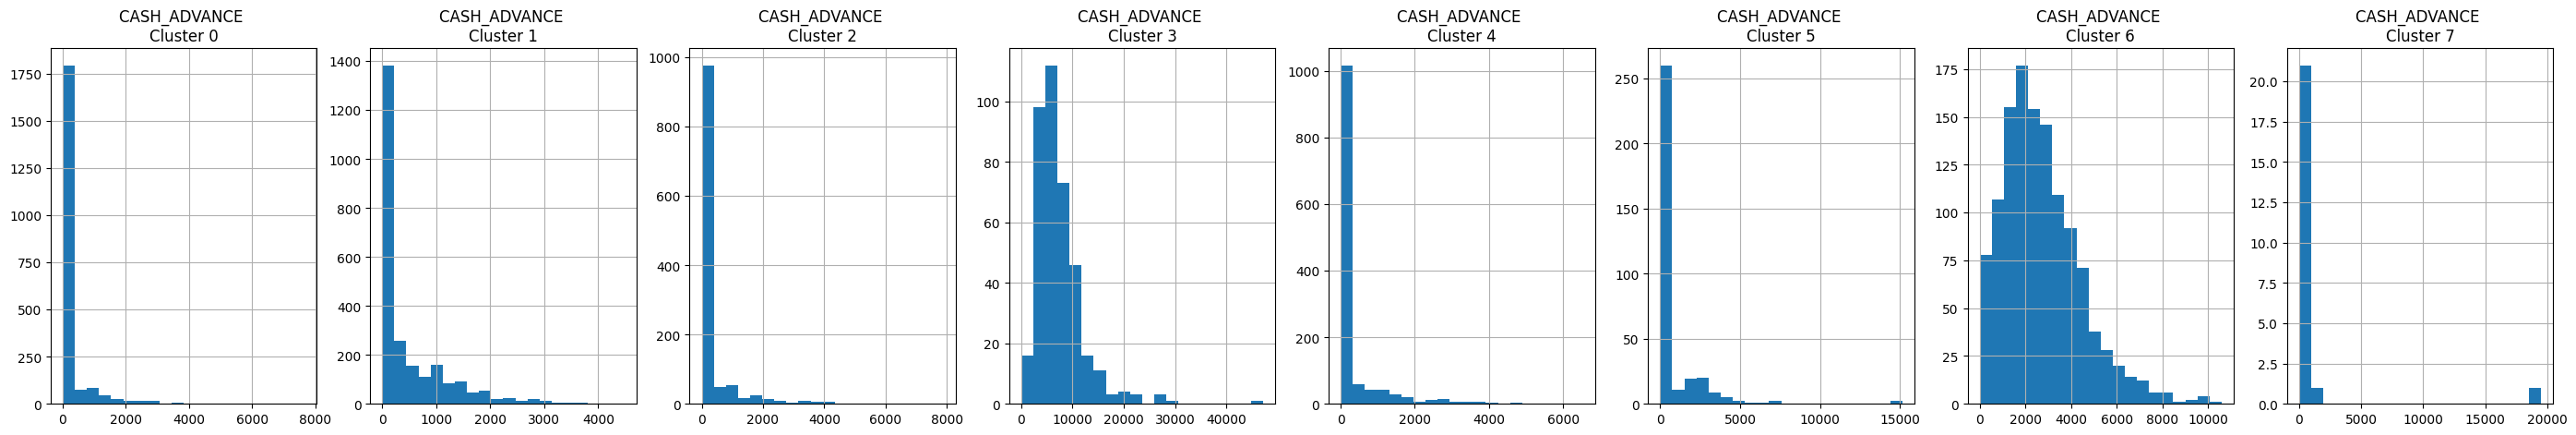

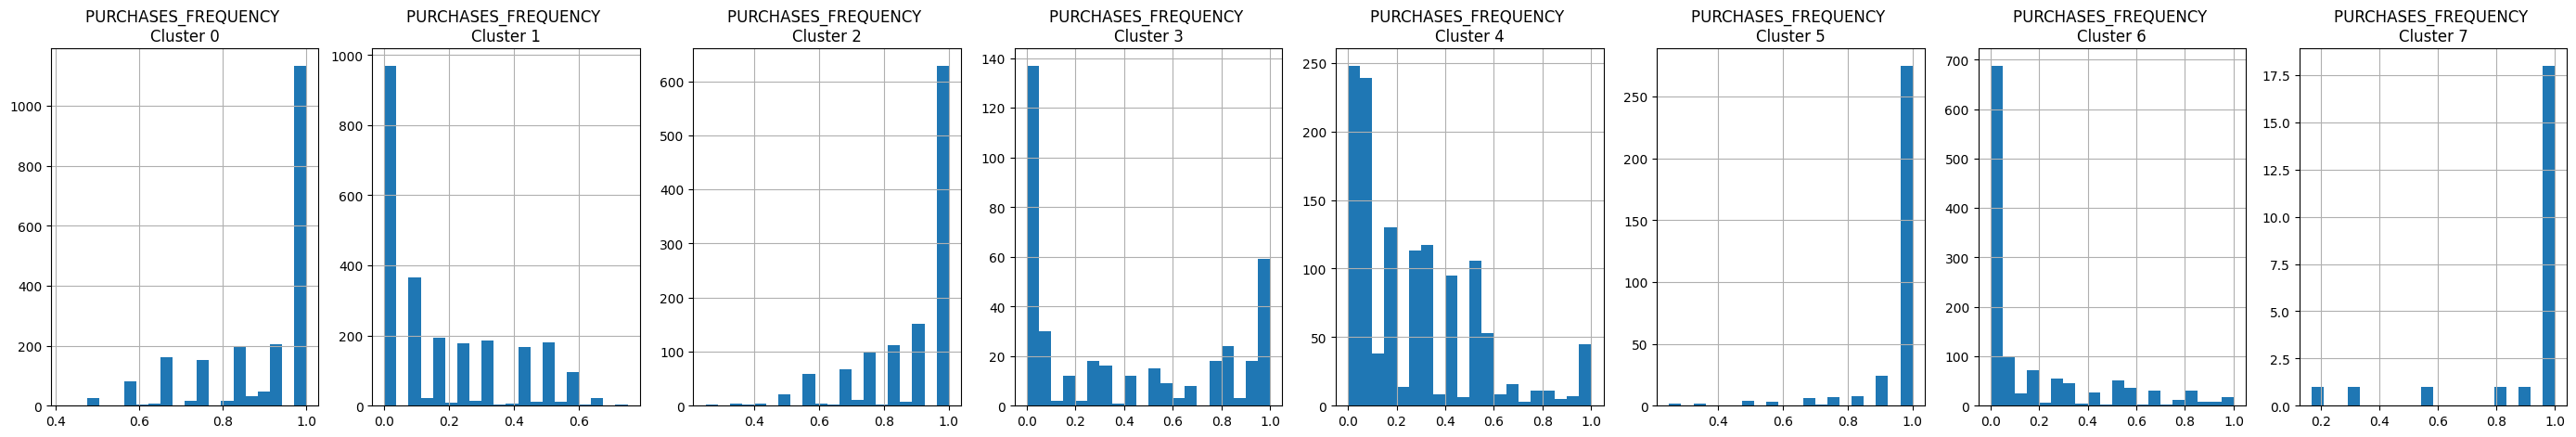

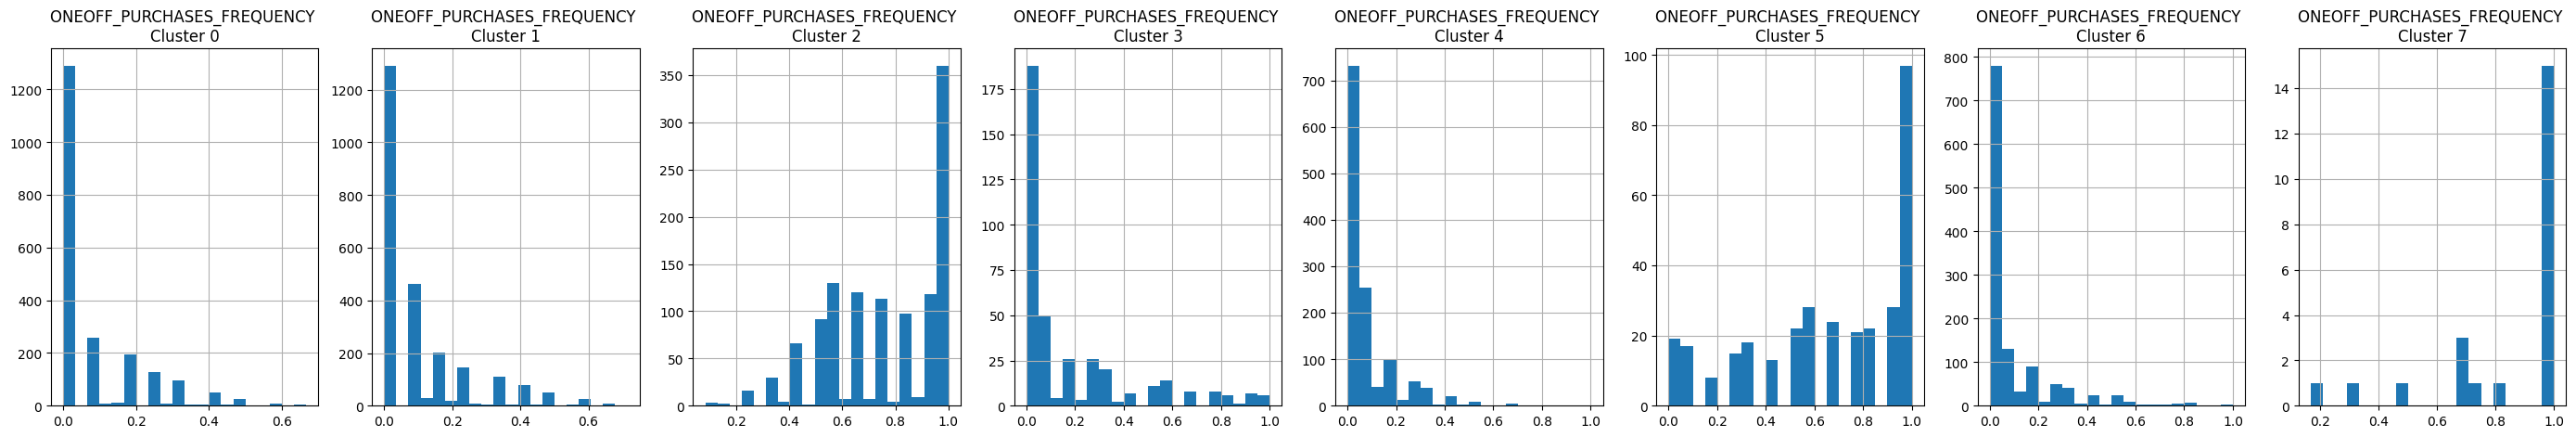

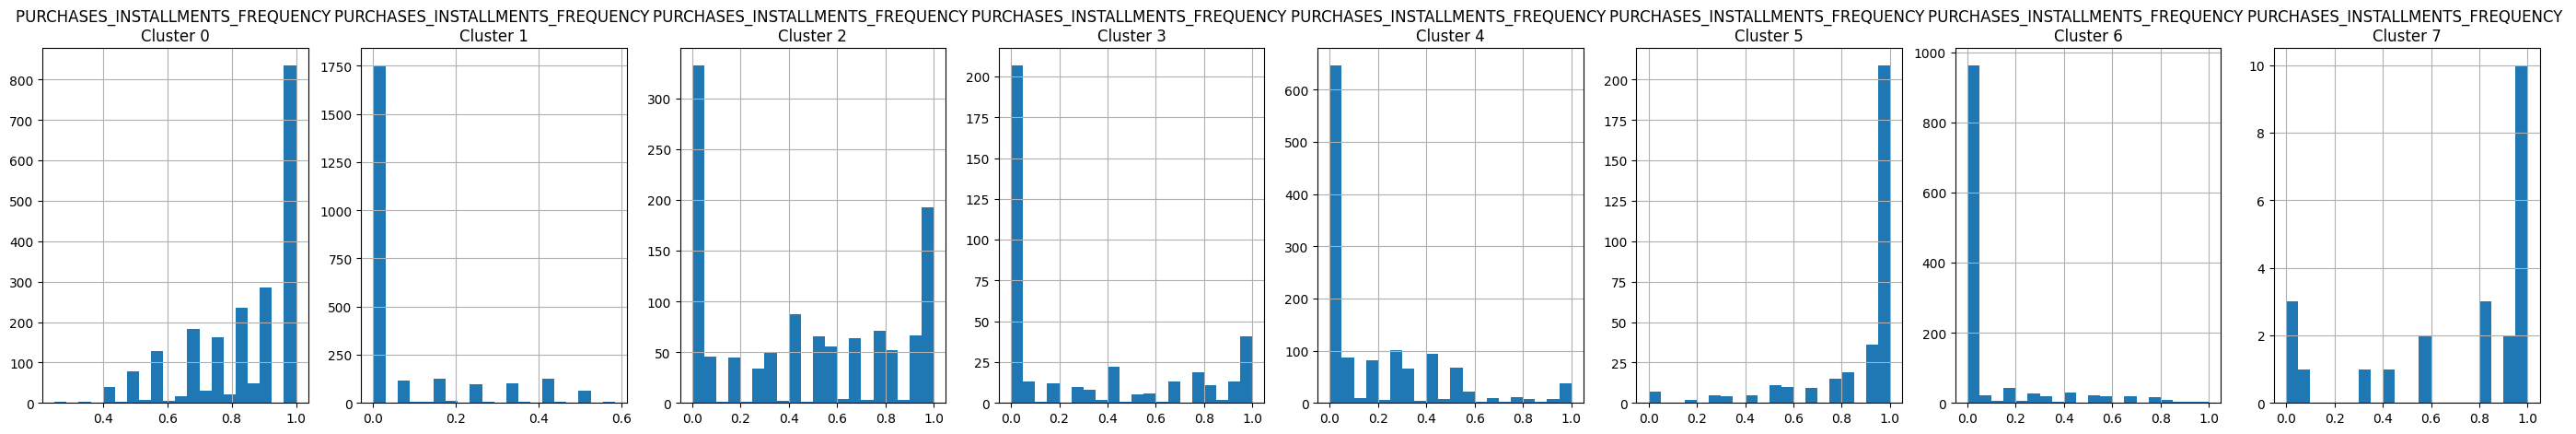

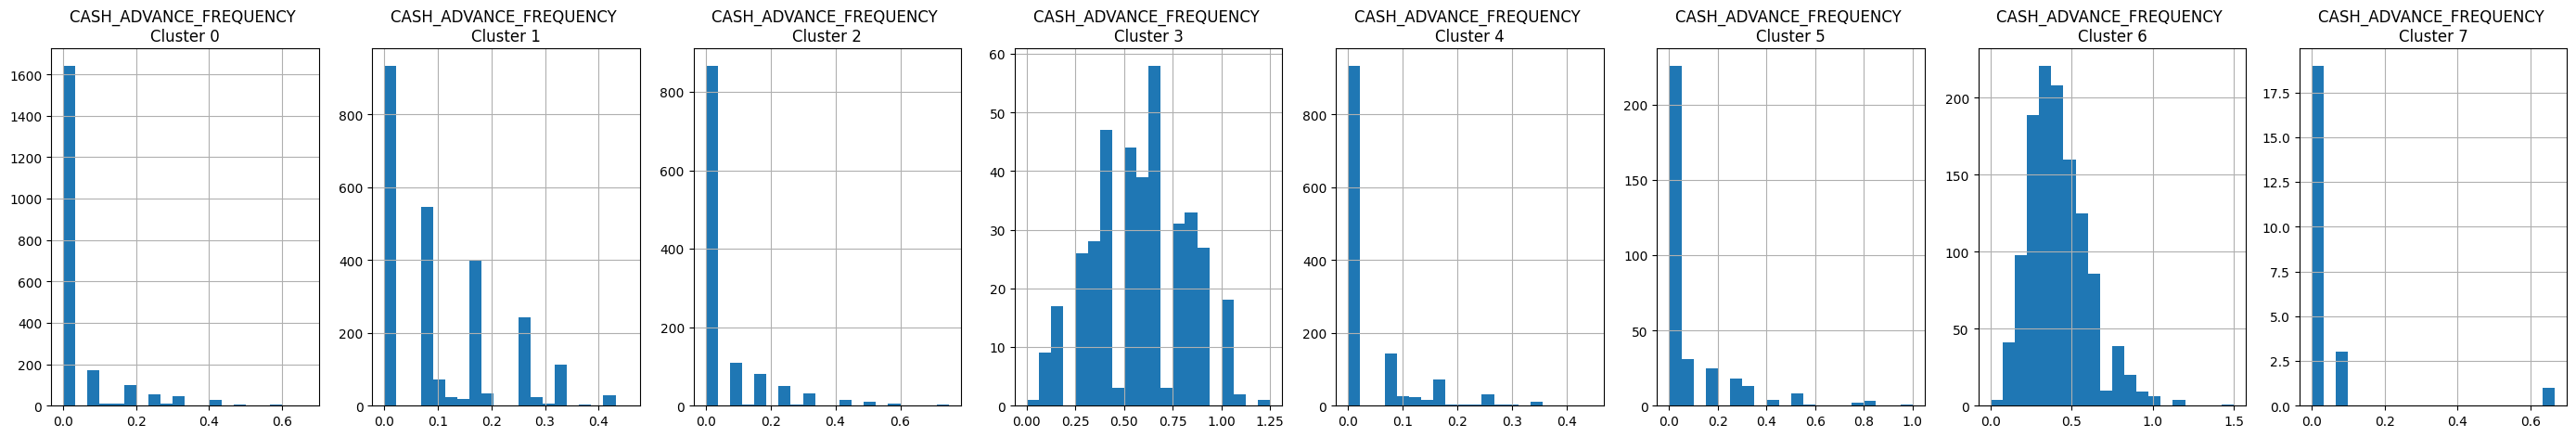

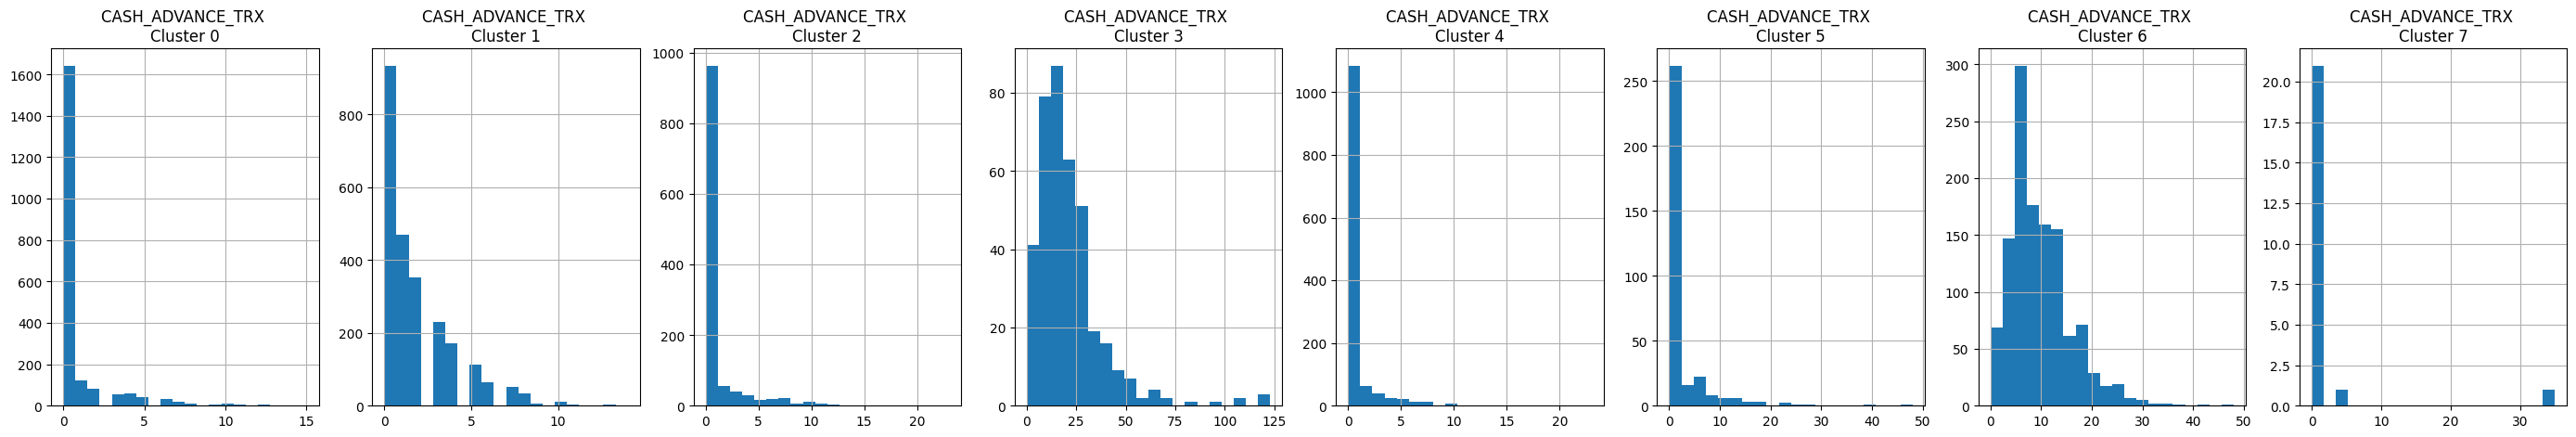

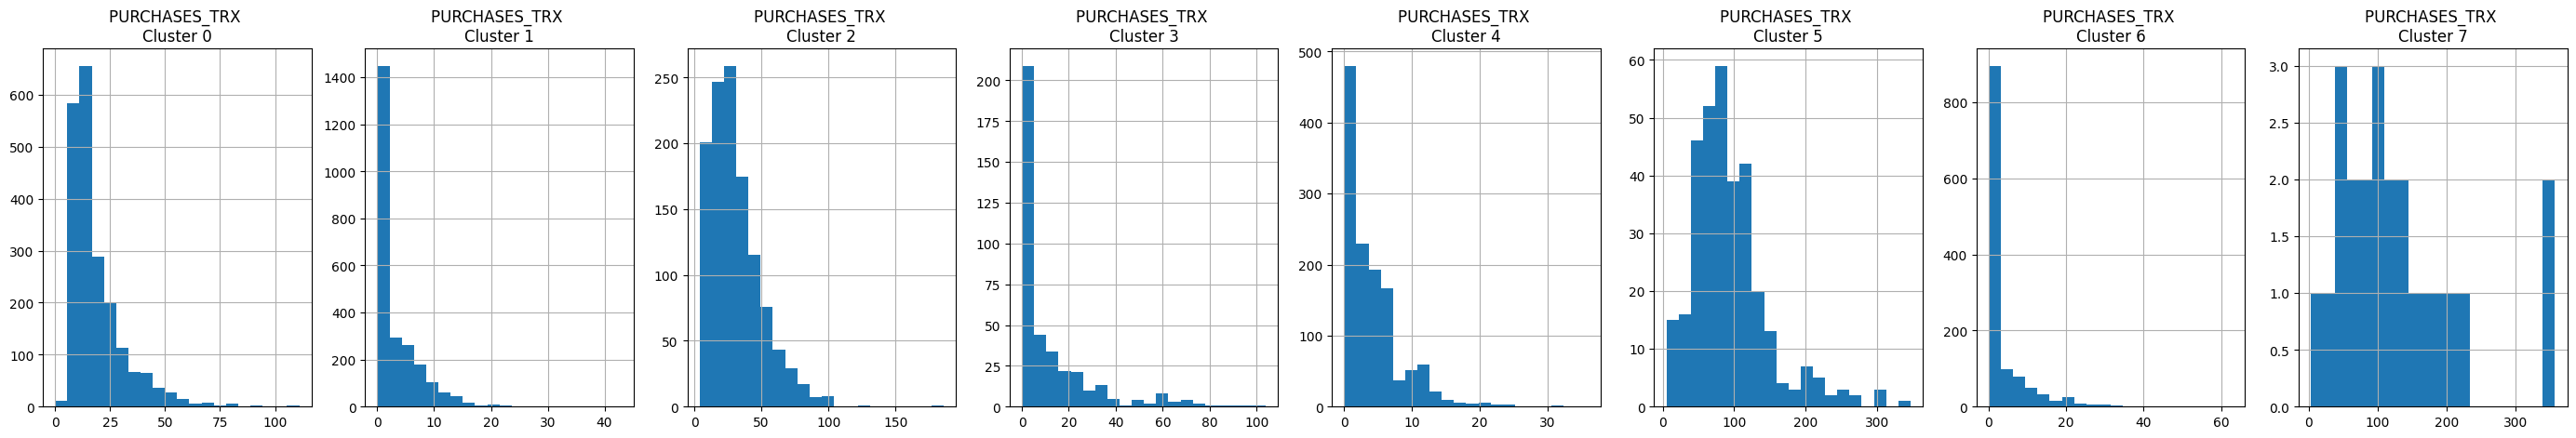

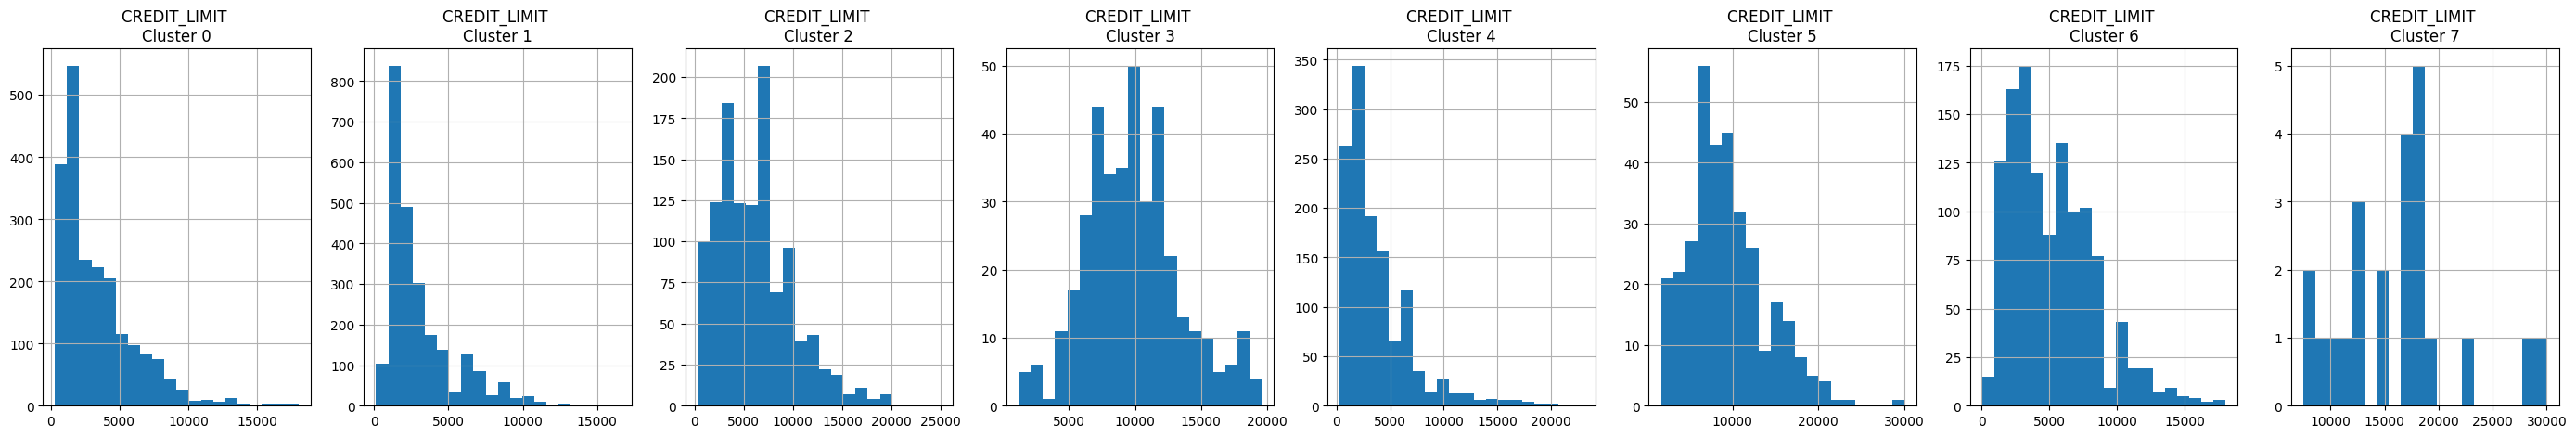

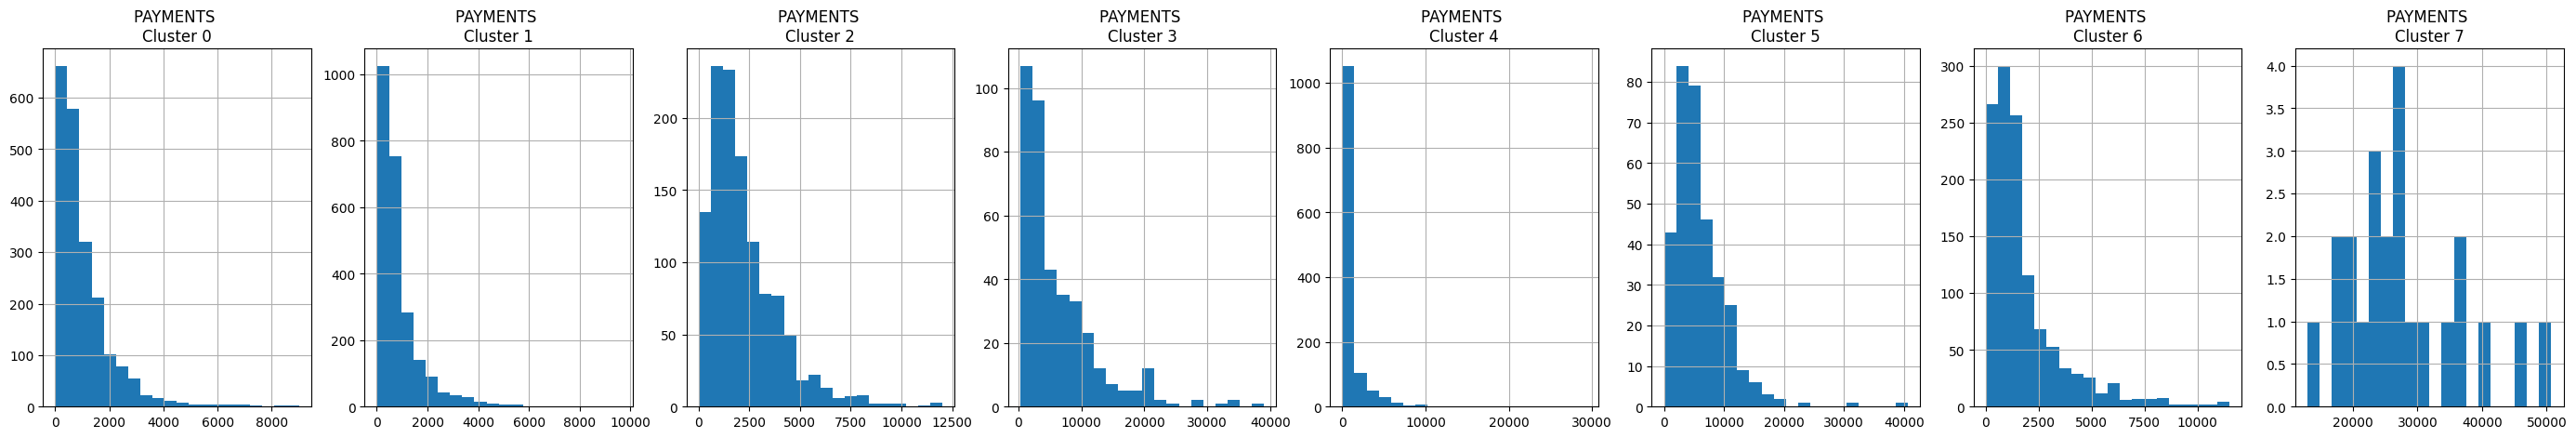

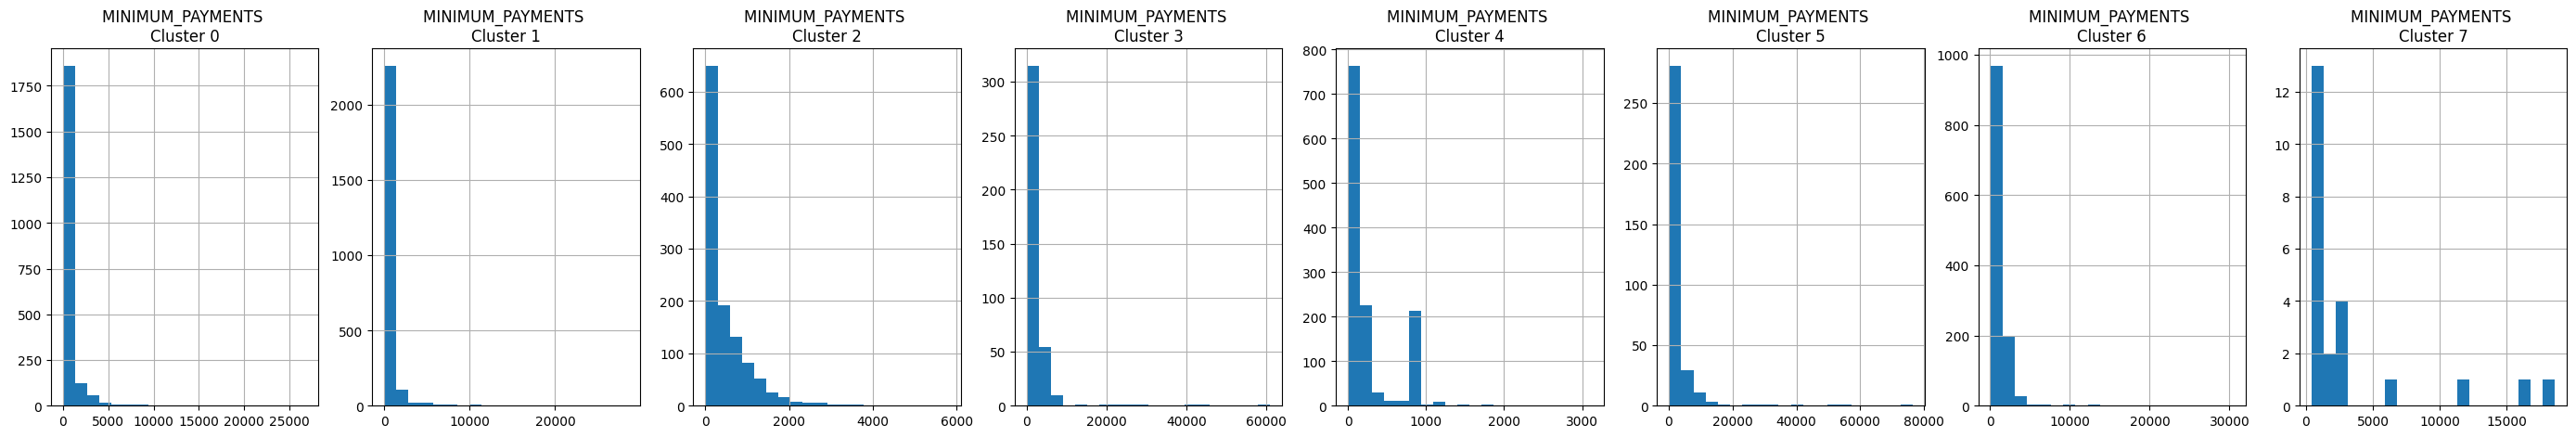

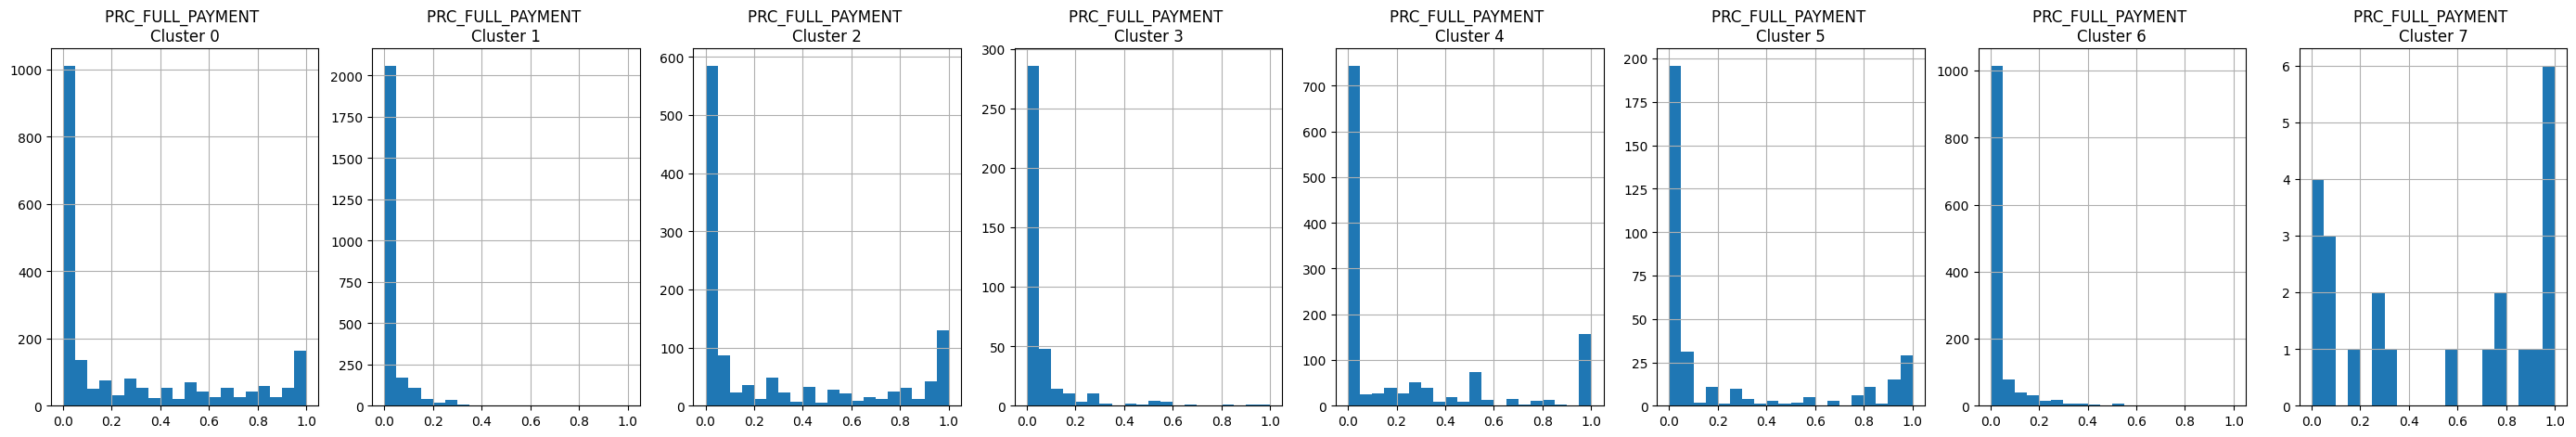

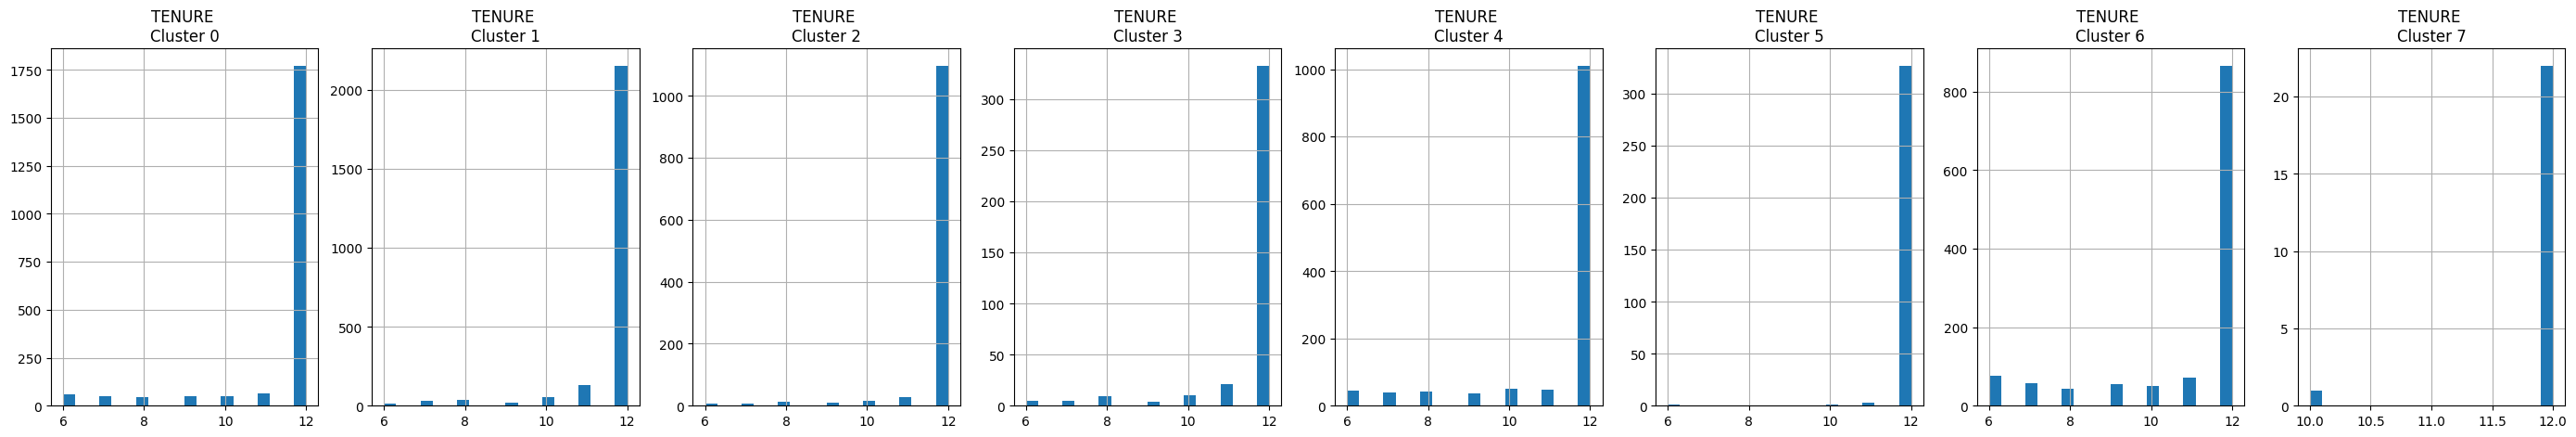

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show()

# Task 7: Apply Principal Component Analysis and Visulize The Results

Principal Component Analysis: Overview
* PCA is an unsupervised machine learning algorithm.
* PCA performs dimensionality reductions while attempting at keeping the original information unchanged.
* PCA works by trying to find a new set of features called components.
* Components are composites of the uncorrelated given input features.

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [ ]:
#Creats a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()


pca1      pca2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()


pca1      pca2  cluster
0 -1.682220 -1.076451        1
1 -1.138295  2.506477        6
2  0.969684 -0.383520        2
3 -0.873628  0.043166        1
4 -1.599434 -0.688581        1

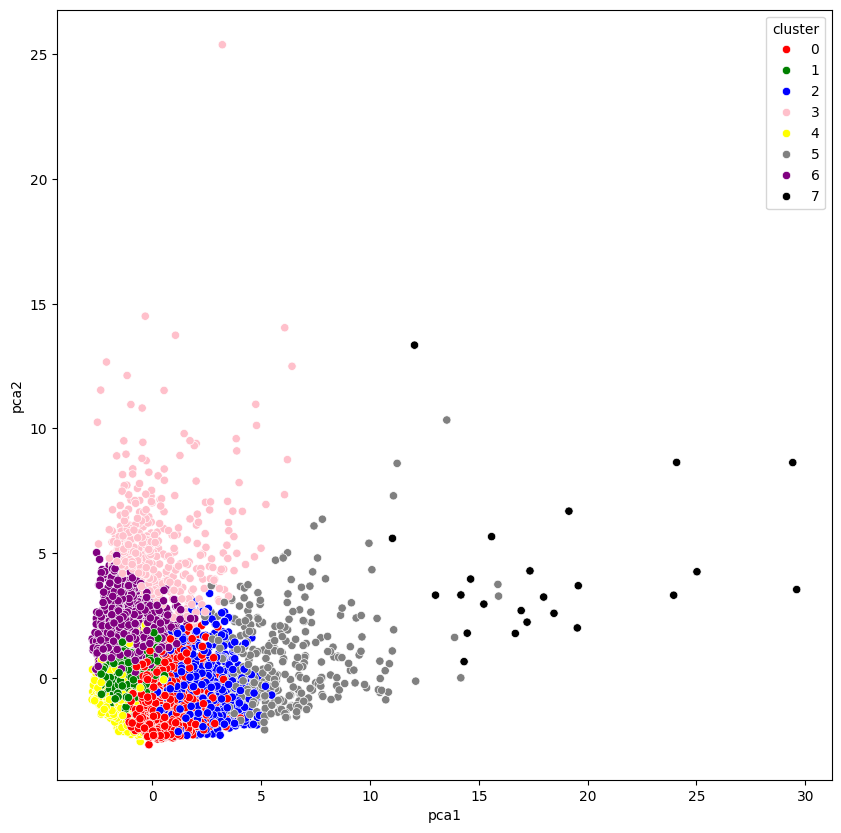

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Task 8: Understand The Theory And Intuition Behind Autoencodeers ##

# AutoEncoders Intuition #

* Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning).
* Auto encoders use the same input data for the input and output,

# The Code Layer #

* Auto encoder works by adding a bottleneck in the network.
* This bottleneck forces the network to create a compressed (encoded) version of the original input.
* Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent)


### Autoencoder Math: High-Level Explanation

Autoencoders are built from neural networks, so the mathematics revolves around matrix operations and optimization. The goal of an autoencoder is to learn an efficient encoding (compression) of input data and then reconstruct it as closely as possible. Let's break down the math involved in the key components: **Encoder**, **Latent Space**, and **Decoder**.

### 1. **The Encoder**

The encoder transforms the input data \( \mathbf{x} \in \mathbb{R}^n \) (where \( n \) is the number of features) into a lower-dimensional representation \( \mathbf{z} \in \mathbb{R}^m \) (where \( m < n \), the dimensionality of the latent space).

- **Mathematical Operation**: The encoder applies a series of affine transformations (matrix multiplication and bias addition) followed by a non-linear activation function like the sigmoid or ReLU.
  
The encoder transformation is represented as:
\[
\mathbf{z} = f(\mathbf{W}_e \mathbf{x} + \mathbf{b}_e)
\]
- \( \mathbf{x} \): Input data (e.g., a vector representing customer data).
- \( \mathbf{W}_e \): Weight matrix for the encoder.
- \( \mathbf{b}_e \): Bias vector for the encoder.
- \( f \): Non-linear activation function (e.g., ReLU, sigmoid).
- \( \mathbf{z} \): The compressed representation (latent space).

### 2. **Latent Space (Bottleneck)**

The latent space \( \mathbf{z} \) represents the compressed or lower-dimensional version of the input data. The autoencoder learns the most significant features of the data in this space. This is where the model discards irrelevant details and retains important patterns.

### 3. **The Decoder**

The decoder attempts to reconstruct the input \( \mathbf{x} \) from the latent space representation \( \mathbf{z} \). The decoder typically mirrors the structure of the encoder, but instead of compressing the data, it expands \( \mathbf{z} \) back into the original data’s dimensions.

- **Mathematical Operation**: The decoder applies another set of affine transformations and non-linear activation functions to map the latent space back to the original input space.

The decoder transformation is represented as:
\[
\mathbf{\hat{x}} = g(\mathbf{W}_d \mathbf{z} + \mathbf{b}_d)
\]
- \( \mathbf{\hat{x}} \): The reconstructed data (output of the autoencoder).
- \( \mathbf{W}_d \): Weight matrix for the decoder.
- \( \mathbf{b}_d \): Bias vector for the decoder.
- \( g \): Non-linear activation function (similar to the encoder).

### 4. **Reconstruction Loss (Optimization Objective)**

The goal of the autoencoder is to make the reconstructed output \( \mathbf{\hat{x}} \) as close as possible to the original input \( \mathbf{x} \). This is achieved by minimizing the **reconstruction error** (or **loss**), which measures the difference between \( \mathbf{x} \) and \( \mathbf{\hat{x}} \).

- **Common Loss Functions**: For continuous data, the **mean squared error (MSE)** is a typical loss function.
\[
\mathcal{L} = \frac{1}{n} \sum_{i=1}^{n} (\mathbf{x}_i - \mathbf{\hat{x}}_i)^2
\]
- For binary data, **binary cross-entropy** can be used as the loss function.

### 5. **Training the Autoencoder**

The autoencoder is trained using **backpropagation** and **gradient descent** (or any other optimization algorithm like Adam) to minimize the reconstruction loss. The training process updates the weight matrices \( \mathbf{W}_e \) and \( \mathbf{W}_d \), and the bias vectors \( \mathbf{b}_e \) and \( \mathbf{b}_d \), so that the network learns the most efficient way to compress and reconstruct the data.

- **Backpropagation**: Calculates the gradient of the loss function with respect to the parameters (weights and biases) and adjusts them to minimize the reconstruction loss.
  
\[
\mathbf{W}_{e, d} \leftarrow \mathbf{W}_{e, d} - \eta \nabla \mathcal{L}
\]
- \( \eta \): Learning rate.
- \( \nabla \mathcal{L} \): Gradient of the loss function with respect to the parameters.

### Putting It All Together

1. **Input**: The original data \( \mathbf{x} \).
2. **Encoding**: The encoder applies the transformation \( \mathbf{z} = f(\mathbf{W}_e \mathbf{x} + \mathbf{b}_e) \), resulting in the latent representation \( \mathbf{z} \).
3. **Decoding**: The decoder attempts to reconstruct the data by applying \( \mathbf{\hat{x}} = g(\mathbf{W}_d \mathbf{z} + \mathbf{b}_d) \), producing \( \mathbf{\hat{x}} \).
4. **Loss Calculation**: The reconstruction loss \( \mathcal{L} = ||\mathbf{x} - \mathbf{\hat{x}}||^2 \) is minimized during training.
5. **Optimization**: Parameters are updated using gradient descent to reduce the loss.

### Summary of the Process:

- **Encoder** compresses the input \( \mathbf{x} \) into a lower-dimensional latent space \( \mathbf{z} \).
- **Decoder** reconstructs the input from the latent space back to \( \mathbf{\hat{x}} \).
- **Loss** measures the difference between the original input and the reconstructed output.
- The model is trained to minimize this loss, learning to represent the data efficiently.

In the context of the **bank customer data case study**, the autoencoder would take customer data as input, compress it into a lower-dimensional latent space, and then attempt to reconstruct the original data. The latent space can be used for tasks like clustering or anomaly detection, as it captures the most essential features of the customer data.

## Task 9: Apply Autoencoders (Perform Dimensionality Reduction Using Autoencoders) ##

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,  BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [ ]:
input_df = Input(shape = (17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer= 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer= 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer= 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer= 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
creditcard_df_scaled.shape


(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.6924
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.3454
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.2681
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.2202
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1890
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.1739
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.1508
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1287
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1281
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.1254
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.1049
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.1059
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0968
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0907
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0826
Ep

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
pred.shape

(8950, 10)

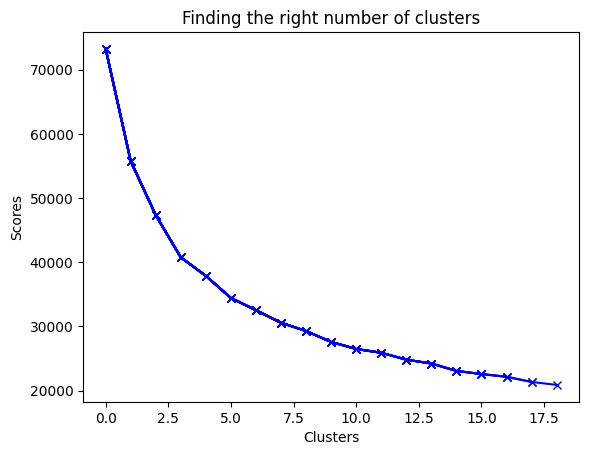

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

  plt.plot(scores_2, 'bx-')
  plt.title('Finding the right number of clusters')
  plt.xlabel('Clusters')
  plt.ylabel('Scores')
  plt.show

<ipython-input-63-a03cdc235775>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-63-a03cdc235775>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


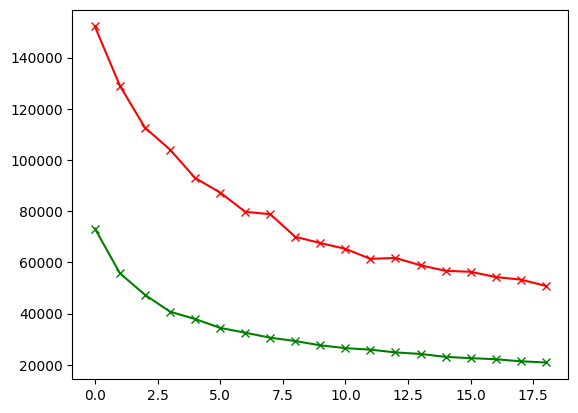

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')


In [ ]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(pred)
labels = kmeans.labels_


In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        4  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        6  
4   678.334763        244.791237          0.000000      12        1

In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()


pca1      pca2  cluster
0 -1.416204  0.216975        1
1  1.889242  1.809000        4
2 -1.214437 -0.488477        1
3 -0.646695  0.072270        6
4 -1.557317  0.378557        1

<ipython-input-69-7af5ccaeb9c0>:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'yellow'])


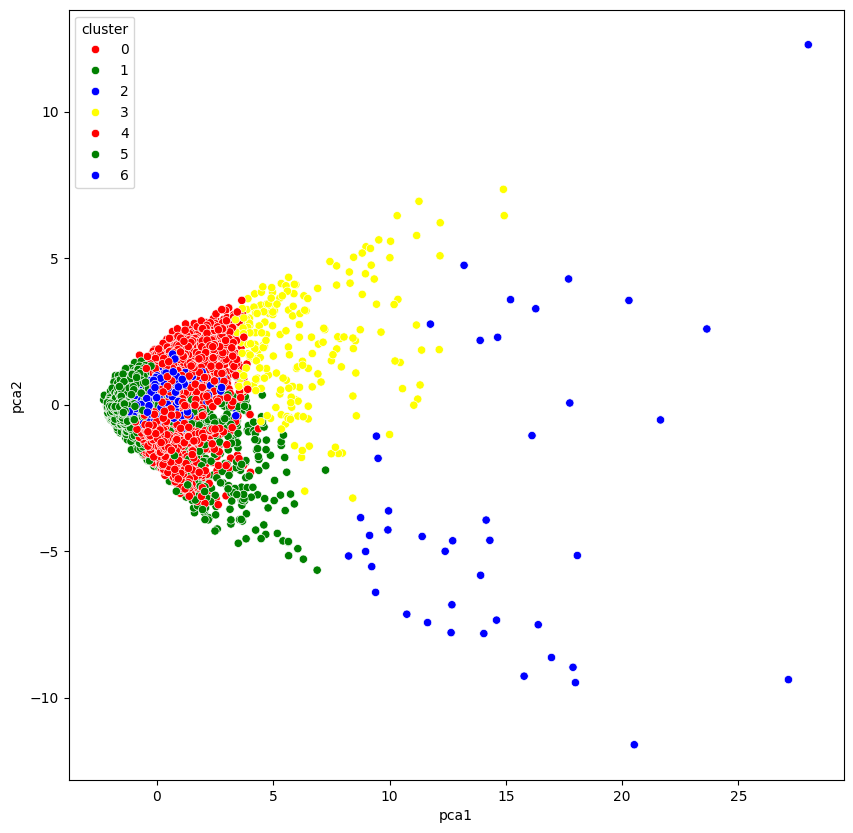

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'yellow'])